<a href="https://colab.research.google.com/github/Salem9809/Iris-KNN-Classifier/blob/main/Copy_of_Module_1_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1 Challange**


**The problem**

The Goal of this project is to build simple machine learning model that predict whether a loan application will be accepted or rejected based on the provided feature.

**Insights & Assumptions**


1.   People with higher income and education will more likly to have thier loan accepted
2.   People that have missing information will more likly to have thier loan rejected
3.   Feature like married, and gender will not affect the acceptance or rejectance of the loan



Uploding the data sets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


Reading the file form excel

In [ ]:
import pandas as pd
train_data = pd.read_csv('train.csv')   # reading the data from csv
test_data  = pd.read_csv('test.csv')


Visualize both data sets

In [ ]:
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,70.0,180,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,311.0,360,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,150.0,360,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,113.0,480,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,123.0,360,0.0,Semiurban,N


# **Explortary Data Analysis (EDA) - Data Exploring**


Checking the shape of both data sets

In [ ]:
train_row = train_data.shape[0]
train_column = train_data.shape[1]
test_row = test_data.shape[0]
test_column = test_data.shape[1]

print("The size of train data sets is:", train_data.shape, "\nthe number of row is:", train_row,
      "and the number of columns is:", train_column)  # Dislpaying total numbers of rows and colomns

print("\nThe size of test data sets is:", test_data.shape,"\nthe number of row is:", test_row,
      "and the number of columns is:", test_column)  # Dislpaying total numbers of rows and colomns


The size of train data sets is: (513, 13) 
the number of row is: 513 and the number of columns is: 13

The size of test data sets is: (101, 13) 
the number of row is: 101 and the number of columns is: 13


Since both data sets share the same number of columns that means both have same columns name. so, I will only displaing one of them

In [ ]:
train_data.columns    # Displaying the columns name

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Checking data type, memory usage, and missing values

In [ ]:
train_data.info() # Show data type and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            101 non-null    object 
 1   Gender             98 non-null     object 
 2   Married            101 non-null    object 
 3   Dependents         98 non-null     object 
 4   Education          101 non-null    object 
 5   Self_Employed      96 non-null     object 
 6   ApplicantIncome    101 non-null    int64  
 7   CoapplicantIncome  101 non-null    int64  
 8   LoanAmount         97 non-null     float64
 9   Loan_Amount_Term   101 non-null    int64  
 10  Credit_History     94 non-null     float64
 11  Property_Area      101 non-null    object 
 12  Loan_Status        101 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 10.4+ KB


Displaing summary of both data sets to gain more knowledge about both data sets

In [ ]:
train_data.describe()    # Show Statistical Summary of train data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,470.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,83.200278,63.375911,0.360556
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,127.000000,360.000000,1.000000
75%,5746.000000,2283.000000,163.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


By Observing the count function we can see from the table above that some columns have missing values like loan amount, loan amount term, and credit history.

In [ ]:
test_data.describe()    # Show Statistical Summary of test data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,101.000000,101.000000,97.000000,101.000000,94.000000
mean,4928.277228,2047.297030,154.948454,336.475248,0.819149
std,3619.679986,5360.438819,96.885066,73.227945,0.386959
min,416.000000,0.000000,9.000000,36.000000,0.000000
25%,2894.000000,0.000000,102.000000,360.000000,1.000000
50%,3652.000000,1032.000000,132.000000,360.000000,1.000000
75%,5800.000000,2306.000000,182.000000,360.000000,1.000000
max,19484.000000,41667.000000,600.000000,480.000000,1.000000


Similar to train data sets there are some missing values in the test data sets

Creating categorical data sets and checking the value count of each categorical columns

In [ ]:
train_cat = train_data[['Gender', 'Married', 'Education', 'Self_Employed',
                       'Credit_History', 'Property_Area', 'Loan_Status']]

for column in train_cat.columns:
  count = train_cat[column].value_counts()
  print("columns name is:", column, "and the value count are:", count, '\n')



columns name is: Gender and the value count are: Gender
Male      409
Female     94
Name: count, dtype: int64 

columns name is: Married and the value count are: Married
Yes    330
No     180
Name: count, dtype: int64 

columns name is: Education and the value count are: Education
Graduate        403
Not Graduate    110
Name: count, dtype: int64 

columns name is: Self_Employed and the value count are: Self_Employed
No     419
Yes     67
Name: count, dtype: int64 

columns name is: Credit_History and the value count are: Credit_History
1.0    398
0.0     72
Name: count, dtype: int64 

columns name is: Property_Area and the value count are: Property_Area
Semiurban    192
Urban        176
Rural        145
Name: count, dtype: int64 

columns name is: Loan_Status and the value count are: Loan_Status
Y    355
N    158
Name: count, dtype: int64 



Creating data set containing only numerical data

In [ ]:
train_numerical = train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term',	'Credit_History']]
train_numerical.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


# **Explortary Data Analysis (EDA) - Data Visualizations**

In [ ]:
import matplotlib.pyplot as plt # importing the library
import seaborn as sns

**1. Bar Chart - loan_Status**

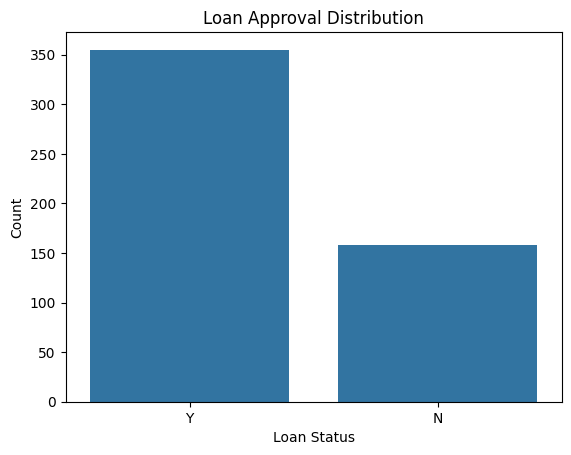

In [ ]:
sns.countplot( x = 'Loan_Status', data = train_data)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

We can see from the graph that around 350 approved and aroud 150 were rejected out of 513.

So, this indicates that larger portion of applicant will have thier loan accepted

**2. Bar Chart - Credit History vs Loan Status**

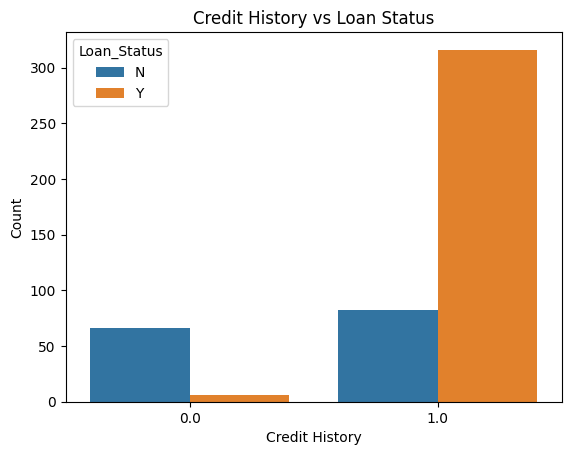

In [ ]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = train_data)
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()


This bar graph show strongly relationship between credit history and loan states. Applicants that have met the guidelins (credit history = 1) are more likly to have accepted their loan.

**3. Box Plot - Applicant Income vs Loan Status**

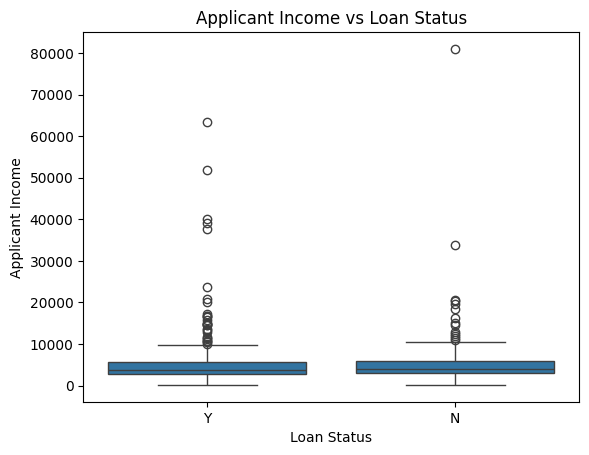

In [ ]:
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = train_data)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


We can observe from the box plot graph that the median applicant for approved (Y) and rejected (N) nearly similar. In addtion, we can see that there are some outliers in the graph that indicate people that have higher income can have their loan reqeust be rejected.

**4. Box Plot - Loan Amount vs Loan Status**

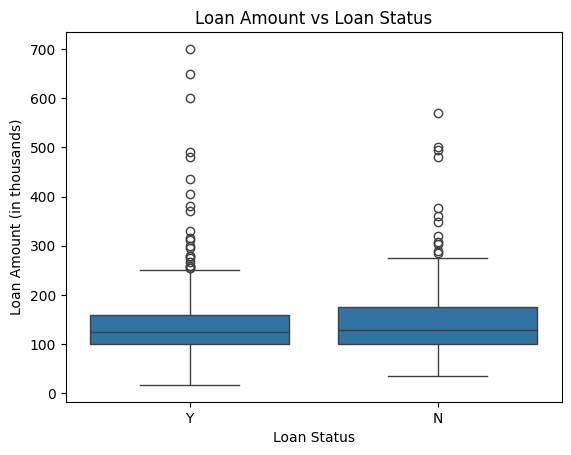

In [ ]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = train_data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount (in thousands)')
plt.show()


**5. Count Plot - Property Area vs Loan Status**

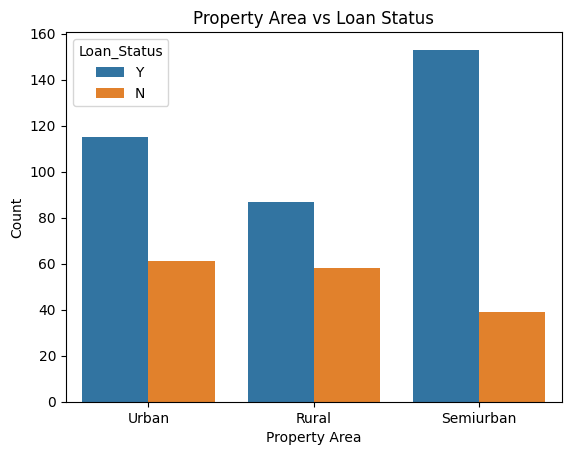

In [ ]:
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = train_data)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


# **Data Cleaning**

Cheking for how many missing values for categorical data sets

In [ ]:
train_cat.isnull().sum(axis = 0)

,0
Gender,10
Married,3
Education,0
Self_Employed,27
Credit_History,43
Property_Area,0
Loan_Status,0


we can see that the columns Gender, Married, Self Employed, and credit history has some null values

Cheking how many missing values in numerical data sets

In [ ]:
train_numerical.isnull().sum(axis = 0)

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18
Loan_Amount_Term,14
Credit_History,43


we can see that the columns Loan Amount, Loan Amount Term, and Credit History has some null values

**Filling Missing Values**

we can fill the missing values by mean, median or mode.
we will choose the median for the numerical data beacuse median are robust agaist outliers.
and for the categorical data we will choose the mode.

In [ ]:
Gender_mode = train_cat['Gender'].mode()[0]
Married_mode = train_cat['Married'].mode()[0]
Self_Employed_mode = train_cat['Self_Employed'].mode()[0]
Credit_History_mode = train_cat['Credit_History'].mode()[0]

In [ ]:
train_cat['Gender'].fillna(Gender_mode, inplace = True)
train_cat['Married'].fillna(Married_mode, inplace = True)
train_cat['Self_Employed'].fillna(Self_Employed_mode, inplace = True)
train_cat['Credit_History'].fillna(Credit_History_mode, inplace = True)

/tmp/ipython-input-1824202476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['Gender'].fillna(Gender_mode, inplace = True)
/tmp/ipython-input-1824202476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cat['Married'].fillna(Married_mode, inplace = True)
/tmp/ipython-input-1824202476.py:2: SettingWithCopyWarning: 
A valu

After fillling we check again for missing values

In [ ]:
train_cat.isnull().sum(axis = 0)

,0
Gender,0
Married,0
Education,0
Self_Employed,0
Credit_History,0
Property_Area,0
Loan_Status,0


we can see from the tabel that we have remove all missing values

In [ ]:
loan_amount_med = train_numerical['LoanAmount'].median()
Loan_Amount_Term_med = train_numerical['Loan_Amount_Term'].median()
Credit_History_med = train_numerical['Credit_History'].median()

In [ ]:
train_numerical['LoanAmount'].fillna(loan_amount_med, inplace = True)
train_numerical['Loan_Amount_Term'].fillna(Loan_Amount_Term_med, inplace = True)
train_numerical['Credit_History'].fillna(Credit_History_med, inplace = True)

/tmp/ipython-input-258001100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numerical['LoanAmount'].fillna(loan_amount_med, inplace = True)
/tmp/ipython-input-258001100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_numerical['Loan_Amount_Term'].fillna(Loan_Amount_Term_med, inplace = True)
/tmp/ipython-input-258001100.py:

After fillling we check again for missing values

In [ ]:
train_numerical.isnull().sum(axis = 0)

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


we can see from the tabel that we have remove all missing values

**Encoding categorical data into numerical data**

In [ ]:
Gender = {'Male' : 0, 'Female': 1}
train_cat['Gender'] = train_cat['Gender'].apply(lambda x: Gender[x])

In [ ]:
Married	= {'No' : 0, 'Yes' : 1}
train_cat['Married'] = train_cat['Married'].apply(lambda x: Married[x])

/tmp/ipython-input-245127071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['Married'] = train_cat['Married'].apply(lambda x: Married[x])


In [ ]:
Education	= {'Not Graduate' : 0, 'Graduate' : 1}
train_cat['Education'] = train_cat['Education'].apply(lambda x: Education[x])

/tmp/ipython-input-1668911913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['Education'] = train_cat['Education'].apply(lambda x: Education[x])


In [ ]:
Self_Employed	= {'No' : 0, 'Yes' : 1}
train_cat['Self_Employed'] = train_cat['Self_Employed'].apply(lambda x: Self_Employed[x])

/tmp/ipython-input-164809245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['Self_Employed'] = train_cat['Self_Employed'].apply(lambda x: Self_Employed[x])


In [ ]:
Property_Area	 = {'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}
train_cat['Property_Area'] = train_cat['Property_Area'].apply(lambda x: Property_Area[x])

/tmp/ipython-input-2788980451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['Property_Area'] = train_cat['Property_Area'].apply(lambda x: Property_Area[x])


In [ ]:
Loan_Status = {'N' : 0, 'Y' : 1}
train_cat['Loan_Status'] = train_cat['Loan_Status'].apply(lambda x: Loan_Status[x])

/tmp/ipython-input-3756110071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['Loan_Status'] = train_cat['Loan_Status'].apply(lambda x: Loan_Status[x])


Checking for correct encoding

In [ ]:
train_cat

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,1.0,2,1
1,0,1,1,0,1.0,0,0
2,0,1,1,1,1.0,2,1
3,0,1,0,0,1.0,2,1
4,0,0,1,0,1.0,2,1
...,...,...,...,...,...,...,...
508,0,1,1,1,1.0,2,1
509,1,0,1,0,1.0,2,1
510,0,0,0,0,1.0,0,0
511,0,1,1,0,1.0,1,1


**Normalization**

we need to make the range of all columns between 0 and 1 to have normal distribution

In [ ]:
cat_max = train_cat.max()
train_cat_max = train_cat.divide(cat_max)

Cheking the the max values is equal to 1 and minimum values equal to 0

In [ ]:
train_cat_max.describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,0.183236,0.649123,0.785575,0.130604,0.859649,0.530214,0.692008
std,0.387237,0.477710,0.410823,0.337296,0.347690,0.394745,0.462114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
num_max = train_numerical.max()
train_numerical_max = train_numerical.divide(num_max)

Cheking the the max values is equal to 1 and minimum values equal to 0

In [ ]:
train_numerical_max.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,513.000000,513.000000,513.000000
mean,0.067864,0.076868,0.205881,0.715789,0.859649
std,0.080076,0.107204,0.116843,0.130342,0.347690
min,0.001852,0.000000,0.024286,0.025000,0.000000
25%,0.035506,0.000000,0.142857,0.750000,1.000000
50%,0.047481,0.060500,0.181429,0.750000,1.000000
75%,0.070938,0.114150,0.228571,0.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# **Bulding the model**

we will selecte Decision Tree model since it caputres non-linear relationship

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Since we did not have enoght time to sumbit the challange before the deadline, we decide to ued train test split to split the train data the have been given to us to able to sumbit the challange on time.

In [ ]:
tree_model = DecisionTreeClassifier(random_state = 1)

X = train_numerical_max[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] + train_cat_max[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']]
y = train_cat_max['Loan_Status']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
tree_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

after training the module we need to predict the loan statue on unseen data

In [ ]:
prediction = tree_model.predict(val_X)

In [ ]:
comparison = pd.DataFrame({'Actual':  val_y, 'Predicted': prediction})
comparison

,Actual,Predicted
47,1.0,1.0
346,0.0,1.0
284,0.0,1.0
221,1.0,1.0
504,1.0,1.0
...,...,...
201,1.0,1.0
291,0.0,1.0
326,1.0,1.0
295,1.0,1.0


In [ ]:
correct = (val_y == prediction).sum()
total = len(val_y)
accuracy = correct / total
print(f"Correct predictions: {correct}/{total}")
print(f"Accuracy: {accuracy:.2f}")


Correct predictions: 91/129
Accuracy: 0.71


we got the accuracy for the module to be 71% which is very good for decesion tree. to improve the model accuracy we can fine tune the decesion tree model by chaining paramerts like max depth, min samples split, and min samples leaf

# **Feature Selected**

we decide to only drop the loan Id column since this feature is just to know the applicant number and it will not affect the loan statues

# **Conslusion**

we can also improve the modul by increasing the data sets, which it was the plan but since we are short in time we decide to just used train test split function to split the train data which cause to reduce in training data and that affct the module accuracy.